In [3]:
function RK4(f::Function, y0::Array, t0, tmax, n)
    sol=[]
    y=y0
    t=collect(linspace(t0,tmax,n))
    for j=1:n
        h=(t[2]-t[1])
        k1=f(y,t[j])
        k2=f(y+k1*(h/2),t[j]+h/2)
        k3=f(y+k2*(h/2),t[j]+h/2)
        k4=f(y+k3*h,t[j]+h)
        y=y+(h/6)*(k1+2k2+2k3+k4)
        sol=push!(sol,[t[j],y])
    end
    sol
end

RK4 (generic function with 1 method)

In [4]:
function Ω_p(t)
    Tmax=1
    T=sqrt(2)/10*Tmax
    Ω=1
    Ω*exp(-((t-Tmax/2)-T)^2/T^2)
end

function Ω_p(t::Array) 
    R=[]
    for k=1:length(t)
        R=push!(R, Ω_p(t[k]))
    end
    R
end

Ω_p (generic function with 2 methods)

In [5]:
function Ω_s(t)
    Tmax=1
    T=(sqrt(2)/10)*Tmax
    Ω=1
    Ω*exp(-((t-Tmax/2)+T)^2/T^2)
end

function Ω_s(t::Array) 
    R=[]
    for k=1:length(t)
        R=push!(R,Ω_s(t[k]))
    end
    R
end

Ω_s (generic function with 2 methods)

In [6]:
using PyPlot

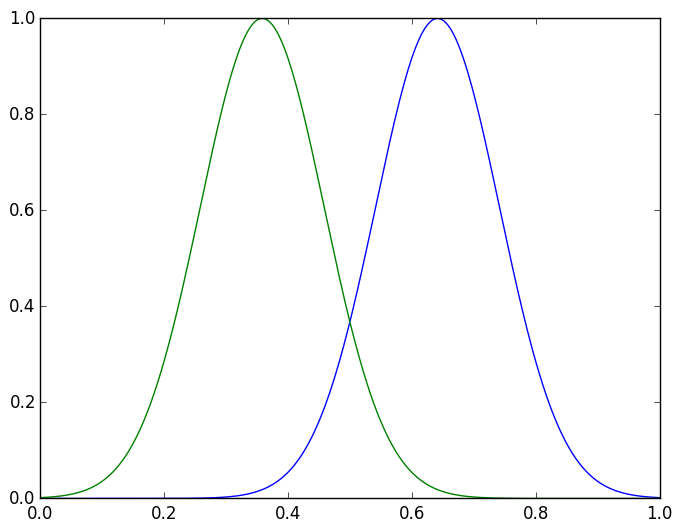

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f1435b8a1d0>

In [7]:
Tmax=1
t=collect(linspace(0.0, Tmax, 1000))
y=Ω_p(t)
plot(t, Ω_p(t))
plot(t, Ω_s(t))

In [8]:
function P(g::Array,t)
    γ31=550
    γ32=550
    Δp=0
    Δs=0
    
    #ro11=g[1]
    ro22=g[1]
    ro33=g[2]
    Rero12=g[3]
    Rero13=g[4]
    Rero23=g[5]
    Imro12=g[6]
    Imro13=g[7]
    Imro23=g[8]
    #g=[ro11, ro22, ro33, Rero12, Imro12, Rero13, Imro13, Rero23, Imro23]
    
    #ro11^2+ro22^2+ro33^2=1
    
    #dro11 = γ12*ro22 - 2*Ω_p(t)*Imro12
    dro22 = γ32*ro33 + 2*Ω_s(t)Imro23
    dro33 = -(γ31+γ32)ro33 - 2*Ω_p(t)*Imro13  - 2*Ω_s(t)*Imro23
    Redro12 = (Δp-Δs)*Imro12 + Ω_s(t)*Imro13 + Ω_p(t)*Imro23
    Redro13 = -0.5*γ31*Rero13 + Ω_s(t)*Imro12 + Δp*Imro13
    Redro23 = -0.5*γ32*Rero23 - Ω_p(t)*Imro12 + Δs*Imro23 
    Imdro12 = (Δs-Δp)Rero12 - Ω_s(t)*Rero13 + Ω_p(t)*Rero23
    Imdro13 = Ω_p(t)*ro22 + 2*Ω_p(t)*ro33 - Ω_s(t)*Rero12 - Δp*Rero13 - 0.5*γ31*Imro13 - Ω_p(t)
    Imdro23 = -Ω_s(t)*ro22 + Ω_s(t)*ro33 - Ω_p(t)*Rero12 - Δs*Rero23 - 0.5*γ32*Imro23
    

    res=[dro22, dro33, Redro12, Imdro12, Redro13, Imdro13, Redro23, Imdro23]
end

P (generic function with 1 method)

In [9]:
g0  = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
tic()
R1=RK4(P,g0,0,Tmax,10000)
toc()


 in depwarn at deprecated.jl:73
 in oldstyle_vcat_warning at ./abstractarray.jl:29
 in vect at abstractarray.jl:38
 in RK4 at In[3]:12
 in include_string at loading.jl:266
 in execute_request_0x535c5df2 at /home/oscar/.julia/v0.4/IJulia/src/execute_request.jl:177
 in eventloop at /home/oscar/.julia/v0.4/IJulia/src/IJulia.jl:141
 in anonymous at task.jl:447
while loading In[9], in expression starting on line 3


elapsed time: 1

 in depwarn at deprecated.jl:73
 in oldstyle_vcat_warning at ./abstractarray.jl:29
 in vect at abstractarray.jl:38
 in RK4 at In[3]:12
 in include_string at loading.jl:266
 in execute_request_0x535c5df2 at /home/oscar/.julia/v0.4/IJulia/src/execute_request.jl:177
 in eventloop at /home/oscar/.julia/v0.4/IJulia/src/IJulia.jl:141
 in anonymous at task.jl:447
while loading In[9], in expression starting on line 3


1.644321925

In [10]:
tiempo=[]
for i=1:length(R1)
    tiempo=push!(tiempo,R1[i][1])
end

ro2=[]
for i=1:length(R1)
    ro2=push!(ro2,R1[i][2])
end

ro3=[]
for i=1:length(R1)
    ro3=push!(ro3,R1[i][3])
end


In [11]:
ro2

10000-element Array{Any,1}:
 -7.28513e-42
 -1.62728e-36
 -1.28283e-35
 -5.38724e-35
 -1.62979e-34
 -4.01622e-34
 -8.5956e-34 
 -1.65961e-33
 -2.96223e-33
 -4.96987e-33
 -7.93125e-33
 -1.21454e-32
 -1.79657e-32
  ⋮          
 -0.935338   
 -0.93534    
 -0.935343   
 -0.935345   
 -0.935348   
 -0.93535    
 -0.935353   
 -0.935355   
 -0.935357   
 -0.93536    
 -0.935362   
 -0.935365   

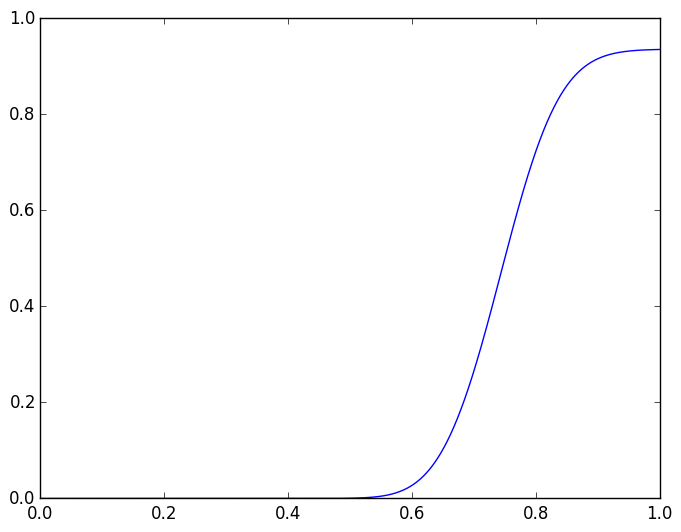

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f1434007b50>

.644321925 seconds


In [12]:
plot(tiempo,-ro2)

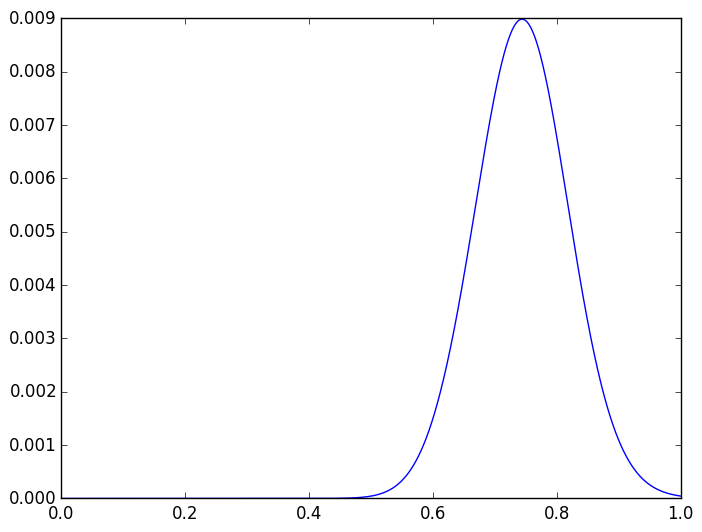

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f1433f3a8d0>

In [13]:
plot(tiempo,-ro3)

In [14]:
Tmax

1

In [15]:
ro1=1+ro2+ro3 ;

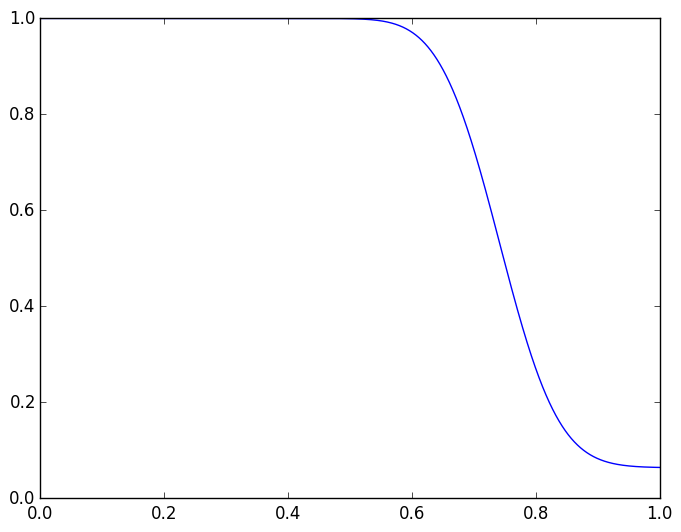

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f1433daadd0>

In [17]:
plot(tiempo,ro1)

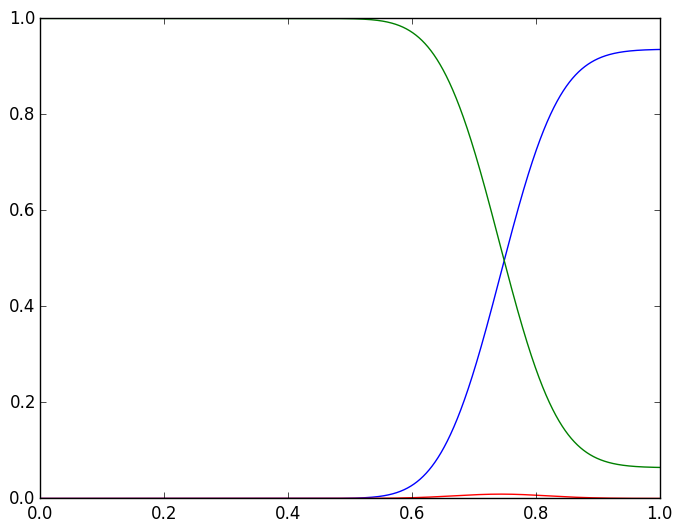

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f1433b03dd0>

In [21]:
plot(tiempo,-ro2)
plot(tiempo,ro1)
plot(tiempo,-ro3)
#plot(t, Ω_p(t))
#plot(t, Ω_s(t))